In [66]:
import os
import pandas as pd

In [67]:
file_path = os.path.join('/','home','jovyan','work','src','data','adult.data.csv')

if not os.path.exists(file_path):
  raise FileNotFoundError(f"file not found: {file_path}")

data = pd.read_csv(file_path)

print(data.shape)
print(data.info())
print(data.isnull())

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
         age  workclass  fnlwgt  education  education-num  marital-status  \

<Axes: >

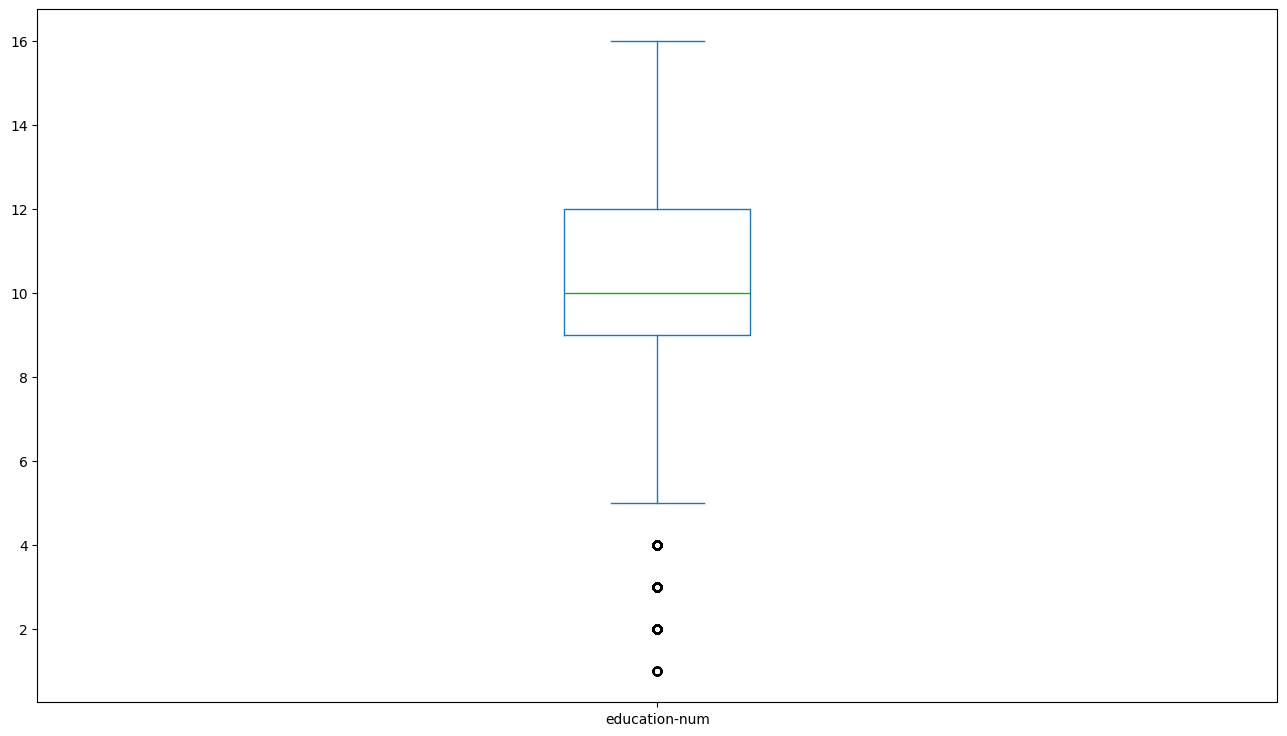

In [68]:
data['education-num'].plot(figsize=(16,9), kind='box')

In [228]:
race = data['race'].value_counts()
race


race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [70]:
# data['sex'].value_counts()
men_mean = data[data['sex'] == 'Male']['age'].mean().round(1)
men_mean



np.float64(39.4)

In [71]:
edus = data['education'].value_counts()
percentages = edus / edus.sum() * 100
percentages['Bachelors'].round(1)

np.float64(16.4)

In [72]:
q1 = data['education-num'].quantile(.25)
q3 = data['education-num'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
cleaned = data[ data['education-num'] > lower_bound]
cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data[['education']].value_counts()


education   
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [128]:
mask_edu = (data['education'] == 'Doctorate') | (data['education'] == 'Bachelors') | (data['education'] == 'Masters')
higher_edus = data[mask_edu]
lower_edu = data[~mask_edu]

rich_high_edu = data[mask_edu][['education', 'salary']].value_counts(normalize=True, subset='salary').get('>50K')
(rich_high_edu * 100).round(1)

rich_lower_edu = lower_edu[['education', 'salary']].value_counts(normalize=True, subset='salary').get('>50K')
rich_lower_edu


np.float64(0.173713601914639)

In [ ]:
hours_mask = data['hours-per-week'].value_counts().min()

data[data['hours-per-week'] == hours_mask][['hours-per-week','salary']].value_counts(normalize=True, subset='salary')

salary
<=50K    0.9
>50K     0.1
Name: proportion, dtype: float64

In [227]:
by_country = data[['native-country', 'salary']].groupby('native-country')

sorted_richest = by_country.value_counts(normalize=True).filter(like='>50K').sort_values(ascending=False)
sorted_richest.index[0][0]
(sorted_richest.values[0] * 100).round(1)


np.float64(41.9)

In [224]:
in_india = data[data['native-country'] == 'India'][['occupation', 'salary']].groupby('salary')

in_india.value_counts().filter(like='>50K').sort_values(ascending=False).index[0][1]

'Prof-specialty'

In [ ]:
def calculate_demographic_data(print_data=True):

    # Read data from file
    df = data

    # How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts()

    # What is the average age of men?
    average_age_men = df[df['sex'] == 'Male']['age'].mean().round(1)

    # What is the percentage of people who have a Bachelor's degree?
    bachelors = df['education'].value_counts()
    percentages = bachelors / bachelors.sum() * 100
    percentage_bachelors = percentages['Bachelors'].round(1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`

    mask_edu = (df['education'] == 'Doctorate') | (df['education'] == 'Bachelors') | (df['education'] == 'Masters')
    higher_education = df[mask_edu][['education', 'salary']].value_counts(normalize=True, subset='salary').get('>50K')
    lower_education = df[~mask_edu][['education', 'salary']].value_counts(normalize=True, subset='salary').get('>50K')

    # percentage with salary >50K
    higher_education_rich = (higher_education * 100).round(1)
    lower_education_rich = (lower_education * 100).round(1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].value_counts().min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week'] == min_work_hours][['hours-per-week', 'salary']].value_counts(normalize=True, subset='salary').get('>50K')

    rich_percentage = (num_min_workers * 100).round(1)

    # What country has the highest percentage of people that earn >50K?
    by_country = df[['native-country', 'salary']].groupby('native-country')
    sorted_richest = by_country.value_counts(normalize=True).filter(like='>50K').sort_values(ascending=False)
    highest_earning_country = sorted_richest.index[0][0]
    highest_earning_country_percentage = (sorted_richest.values[0] * 100).round(1)

    # Identify the most popular occupation for those who earn >50K in India.
    in_india = df[df['native-country'] == 'India'][['occupation', 'salary']].groupby('salary')
    top_IN_occupation = in_india.value_counts().filter(like='>50K').sort_values(ascending=False).index[0][1]

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count)
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }
